## Customer Churn Prediction
#### - It is also known as customer attrition 
#### - In this customer leaves the service  or the compny for some reasons 
#### - Factors can be like dissatisfaction, low salary, poor customer experience  e

##### importing libraries 

In [177]:
import pandas as pd
import numpy as np

# for Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler

#for models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline

import joblib

#### About dataset
churn_modelling.csv

##### CustomerId: A unique identifier assigned to each customer.
##### Surname: Surname of the customer.
##### CreditScore: Credit Score of the customer
##### Geography: The geographical location or country where the customer resides.
##### Gender: Specifies The gender of the customer ( Male or Female).
##### Age: Represents the age of the customer.
##### Tenure: Refers to the number of years the customer has been with the bank or service .
##### Balance: Indicates the account balance of the customer.
##### NumOfProducts: Represents the number of products or services the customer has with the bank.
##### HasCrCard: A binary attribute indicating whether the customer has a credit card (1 for yes, 0 for no).
##### IsActiveMember: A binary attribute indicating whether the customer is an active member of the bank (1 for yes, 0 for no).
##### EstimatedSalary: Represents the estimated salary of the customer.

##### Exited: This attribute indicates whether the customer has churned or exited the bank (1 for churned, 0 for retained).

#### Load Dataset

In [104]:
data=pd.read_csv(r'Churn_Modelling.csv')

#### Function to display data

In [105]:
def disp_headtail(data,n=5):
    print("Top {0} rows of data".format(n))
    print(data.head(n))
    print()
    print("Last {0} rows of data".format(n))
    print(data.tail(n))

In [106]:
disp_headtail(data,10)

Top 10 rows of data
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86             

In [107]:
data.shape

(10000, 14)

In [108]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [109]:
def getInfoDescribe(data):
    print("INFO")
    print(data.info())
    print()
    print("DESCRIBE")
    print(data.describe())

In [110]:
getInfoDescribe(data)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

DESCRIBE
         RowNumber    CustomerId   CreditScore           Age        Tenure

In [76]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### data visualization

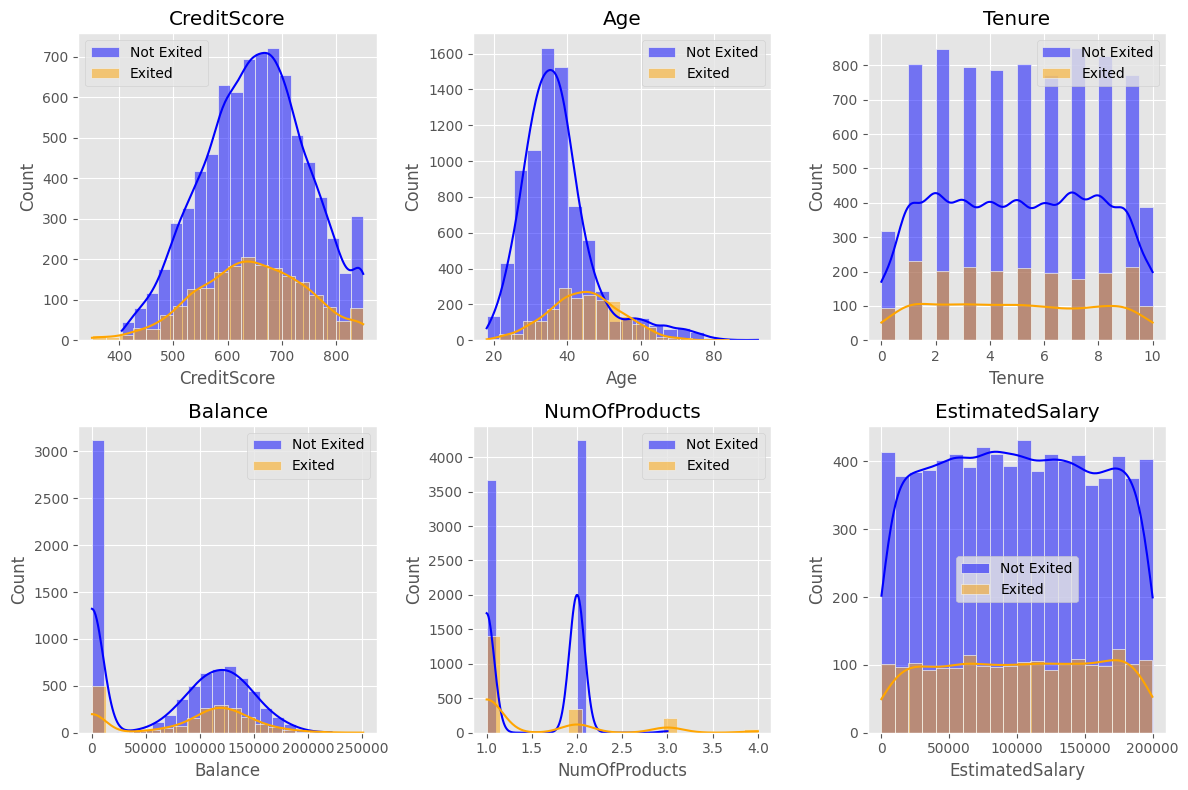

In [77]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[data['Exited'] == 0][feature], bins=20, kde=True, color='blue', label='Not Exited')
    sns.histplot(data[data['Exited'] == 1][feature], bins=20, kde=True, color='orange', label='Exited')
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()


#### The plots above display the count of employees who exited or stayed, categorized by different features.
#### It can be observed from the CreditScore plot that employees with a score below 400 are more likely to have exited.
#### Based on the Age plot, it appears that employees aged between 38 and 55 are less likely to stay with the company. 

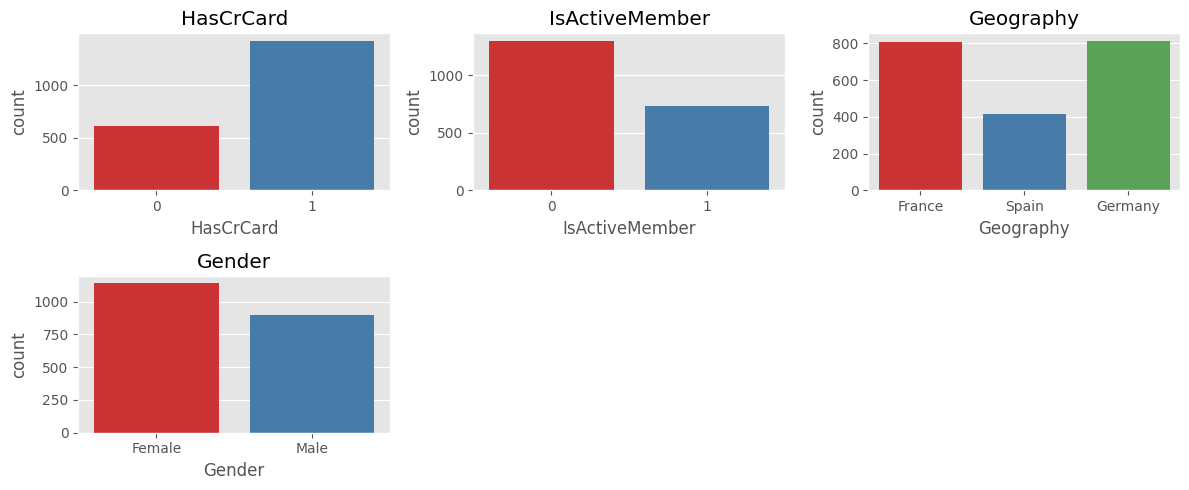

In [78]:
categorical_features = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']

exited_data = data[data['Exited'] == 1]


plt.figure(figsize=(12, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=exited_data, x=feature, palette='Set1')
    plt.title(feature)
plt.tight_layout()
plt.show()


#### The plots above display the count of employees who exited or stayed, categorized by different features.
#### According to the data, people with credit cards have left the company. 
#### Female employees have a higher rate of leaving.

#### Plotting the heatmap of correlation between features 

<Axes: >

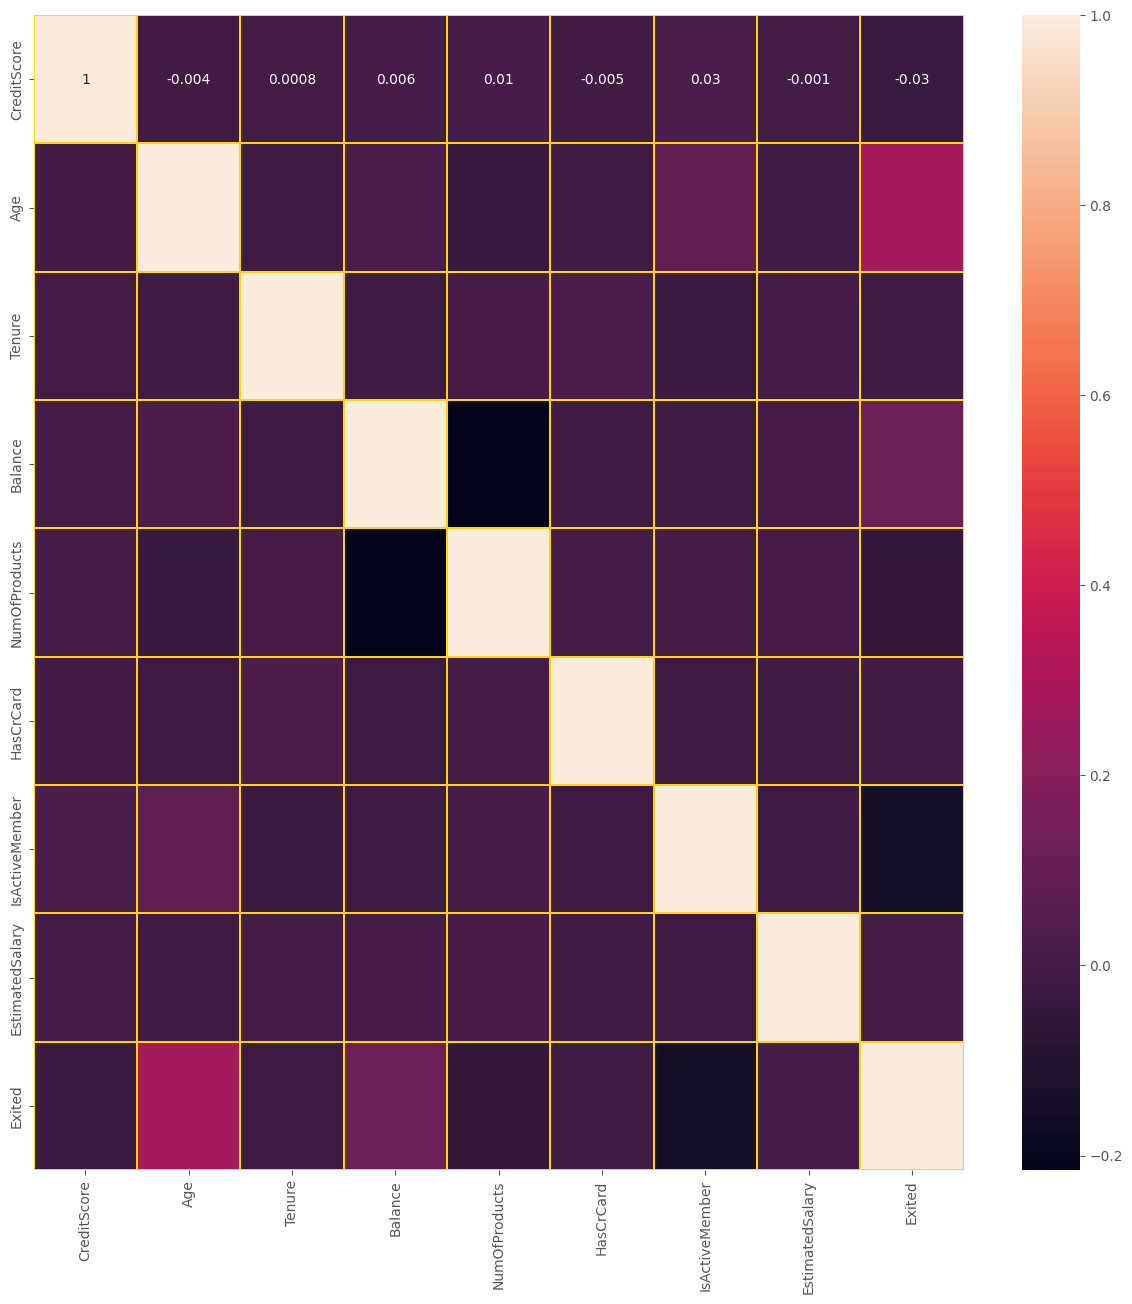

In [79]:
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(data.drop(["RowNumber",'CustomerId'],axis = 1).corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,)

#### Countries with the less and the most common use of credit cards

Geography
France     3543
Germany    1791
Spain      1721
Name: HasCrCard, dtype: int64


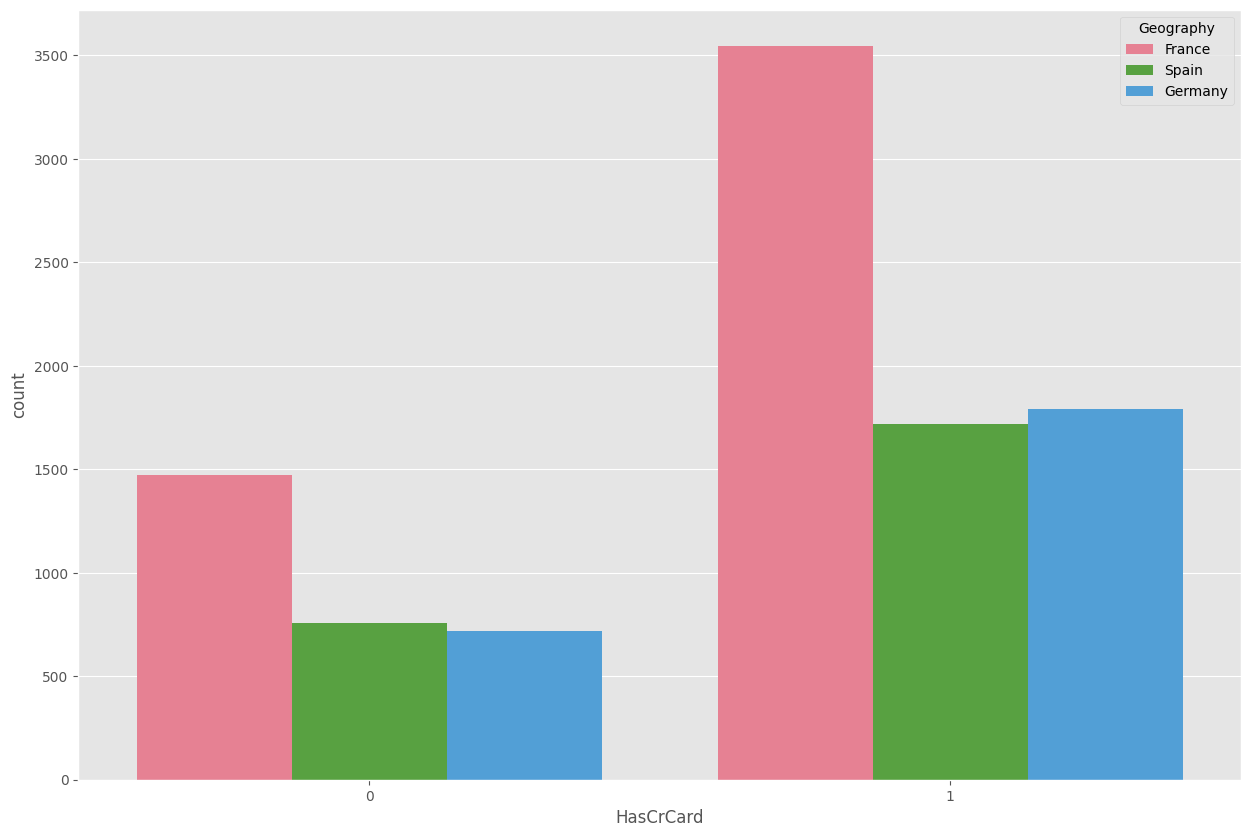

In [80]:
plt.figure(figsize = (15,10)) 
sns.countplot(x="HasCrCard",hue = "Geography", data=data, palette="husl")
print(data.groupby('Geography')["HasCrCard"].sum()) 

In [81]:
below_30 = data[data["Age"]<30]
between_30_40 = data[(data["Age"]>=30) & (data["Age"]<40)]
between_40_50 = data[(data["Age"]>=40) & (data["Age"]<50)]
between_50_60 = data[(data["Age"]>=50) & (data["Age"]<60)]
between_60_70 = data[(data["Age"]>=60) & (data["Age"]<70)]
above_70 = data[(data["Age"]>=70)]

k = below_30["Exited"].sum()
l = between_30_40["Exited"].sum()
m = between_40_50["Exited"].sum()
n = between_50_60["Exited"].sum()
o = between_60_70["Exited"].sum()
p = above_70["Exited"].sum()

In [82]:
age_list = [('Total Stayed=',below_30['Exited'].value_counts()[:1],"Ages below 30==>",k,"Exited"),
            ('Total stayed=',between_30_40['Exited'].value_counts()[:1],'Ages between 30-40==>',l,"Exited"),
            ('Total stayed=',between_40_50['Exited'].value_counts()[:1],"Ages between 40-50==>",m,"Exited"),
            ('Total stayed=',between_50_60['Exited'].value_counts()[:1],"Ages between 50-60==>",n,"Exited"),
            ('Total stayed=',between_60_70['Exited'].value_counts()[:1],"Ages between 60-70==>",o,"Exited"),
            ('Total stayed=',above_70['Exited'].value_counts()[:1],"Ages above 70==>",p,"Exited")]

In [83]:
pie_list=[k,l,m,n,o,p]
labels=age_list
fig={
    "data":[
        {
            "values":pie_list,
            "labels":labels,
            "domain": {"x": [.2, 1]},
            "name": "Age Groups-Exit Rate",
            "hoverinfo":"label+percent+name",
            "hole": .4,
            "type": "pie"
        },],
    "layout":{
        "title":"Percentage of Age Groups for Longer Work With Bank",
        "annotations":[
            {
                "font":{"size":20},
                "showarrow": False,
                "text": "Age Group-Exited",
                "x": 0.60,
                "y": 0.50
            },
        ]
    }  
}
iplot(fig)

In [84]:
df = data.copy()
age_group_data = [None] * len(df['Age'])
for i in range(len(df['Age'])):
    if df['Age'][i] < 30:
        age_group_data[i] = 'Young'
    elif df['Age'][i] >=30 and df['Age'][i] < 40:
        age_group_data[i] = 'Young-Adults'
    elif df['Age'][i] >=40 and df['Age'][i] < 50:
        age_group_data[i] = 'Adults'
    elif df['Age'][i] >=50 and df['Age'][i] < 60:
        age_group_data[i] = 'Elderly-Adults'
    elif df['Age'][i] >=60 and df['Age'][i] < 74:
        age_group_data[i] = 'Old'
    else:
        age_group_data[i] = 'Very-Old'

df['age_group'] = age_group_data

C:\Users\Ravish\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



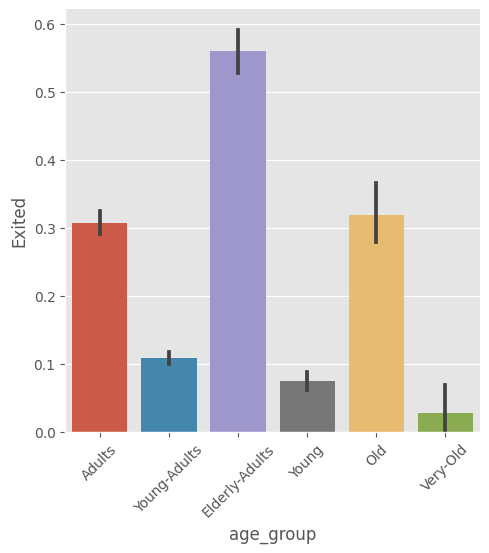

In [85]:
g = sns.factorplot(x = "age_group", y = "Exited", data = df, kind = "bar")
plt.xticks(rotation=45)
g.set_ylabels("Exited")
plt.show()

#### Function to handle null Data

In [111]:
def handleNull(data):
    if not data.isnull().sum().any():
        print("DATA is not having null values")
    else: 
        data.dropna(inplace=True,axis=1)

In [112]:
handleNull(data)

DATA is not having null values


In [113]:
data.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [114]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [115]:
data=pd.get_dummies(data,drop_first=True)

In [116]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [117]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\Ravish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='Exited', ylabel='count'>

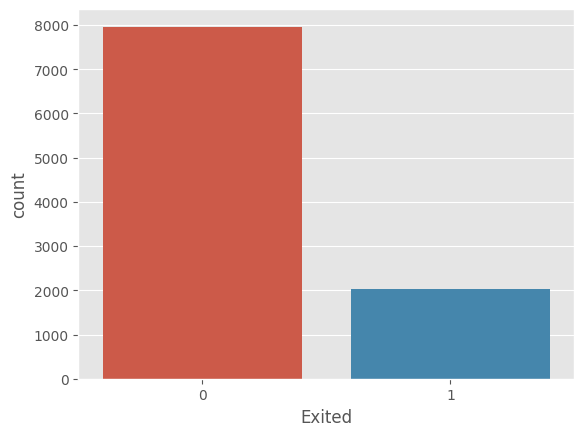

In [118]:
sns.countplot(data['Exited'])

#### here the our target variable having much inbalancing 

###  Generate sample with target value 1 to handle imbalancing of data for output


In [119]:
#pip install imblearn

In [120]:
X=data.drop('Exited',axis=1)
y=data['Exited']

In [121]:
X_sample,y_sample=SMOTE().fit_resample(X,y)

In [122]:
y_sample.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [167]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

### Splitting Data after sampling


In [124]:
X_train,X_test,y_train,y_test=train_test_split(X_sample,y_sample,test_size=0.25,random_state=20)

In [125]:
scaler=StandardScaler()

In [126]:
X_train=scaler.fit_transform(X_train)

In [127]:
X_test=scaler.transform(X_test)

### Logistic Regression

In [128]:
LR=LogisticRegression()

In [129]:
LR.fit(X_train,y_train)

LogisticRegression()

In [130]:
y_predL=LR.predict(X_test)

In [131]:
print("accuracy Score :",accuracy_score(y_test,y_predL))
print("precision Score :",precision_score(y_test,y_predL))
print("recall Score :",recall_score(y_test,y_predL))
print("f1 Score :",f1_score(y_test,y_predL))

accuracy Score : 0.7802611752887996
precision Score : 0.7800498753117207
recall Score : 0.7827827827827828
f1 Score : 0.7814139395453409


In [178]:
CMLOGISTIC = confusion_matrix(y_test,y_predL)
CMLOGISTIC

array([[1543,  441],
       [ 434, 1564]], dtype=int64)

In [179]:

print(classification_report(y_test,y_predL))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1984
           1       0.78      0.78      0.78      1998

    accuracy                           0.78      3982
   macro avg       0.78      0.78      0.78      3982
weighted avg       0.78      0.78      0.78      3982



### SVC

In [136]:
svm=SVC()

In [137]:
svm.fit(X_train,y_train)

SVC()

In [138]:
y_predS=svm.predict(X_test)

In [139]:
print("accuracy Score :",accuracy_score(y_test,y_predS))
print("precision Score :",precision_score(y_test,y_predS))
print("recall Score :",recall_score(y_test,y_predS))
print("f1 Score :",f1_score(y_test,y_predS))

accuracy Score : 0.8352586639879458
precision Score : 0.8473084886128365
recall Score : 0.8193193193193193
f1 Score : 0.8330788804071247


In [180]:
CMSVC = confusion_matrix(y_test,y_predS)
CMSVC

array([[1689,  295],
       [ 361, 1637]], dtype=int64)

In [181]:

print(classification_report(y_test,y_predS))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1984
           1       0.85      0.82      0.83      1998

    accuracy                           0.84      3982
   macro avg       0.84      0.84      0.84      3982
weighted avg       0.84      0.84      0.84      3982



### KNN

In [141]:
knn=KNeighborsClassifier()

In [142]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [143]:
y_predK=knn.predict(X_test)

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [144]:
print("accuracy Score :",accuracy_score(y_test,y_predK))
print("precision Score :",precision_score(y_test,y_predK))
print("recall Score :",recall_score(y_test,y_predK))
print("f1 Score :",f1_score(y_test,y_predK))

accuracy Score : 0.8141637368156706
precision Score : 0.80712890625
recall Score : 0.8273273273273273
f1 Score : 0.8171033119130003


In [182]:
CMKNN = confusion_matrix(y_test,y_predK)
CMKNN

array([[1589,  395],
       [ 345, 1653]], dtype=int64)

In [183]:

print(classification_report(y_test,y_predK))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1984
           1       0.81      0.83      0.82      1998

    accuracy                           0.81      3982
   macro avg       0.81      0.81      0.81      3982
weighted avg       0.81      0.81      0.81      3982



### DT

In [145]:
DT=DecisionTreeClassifier()

In [146]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [147]:
y_predD=DT.predict(X_test)

In [148]:
print("accuracy Score :",accuracy_score(y_test,y_predD))
print("precision Score :",precision_score(y_test,y_predD))
print("recall Score :",recall_score(y_test,y_predD))
print("f1 Score :",f1_score(y_test,y_predD))

accuracy Score : 0.7983425414364641
precision Score : 0.7887868535524408
recall Score : 0.8168168168168168
f1 Score : 0.8025571674452914


In [184]:
CMDT = confusion_matrix(y_test,y_predD)
CMDT

array([[1547,  437],
       [ 366, 1632]], dtype=int64)

In [185]:
print(classification_report(y_test,y_predD))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1984
           1       0.79      0.82      0.80      1998

    accuracy                           0.80      3982
   macro avg       0.80      0.80      0.80      3982
weighted avg       0.80      0.80      0.80      3982



### RF

In [149]:
RF=RandomForestClassifier()

In [150]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
y_predR=RF.predict(X_test)

In [152]:
print("accuracy Score :",accuracy_score(y_test,y_predR))
print("precision Score :",precision_score(y_test,y_predR))
print("recall Score :",recall_score(y_test,y_predR))
print("f1 Score :",f1_score(y_test,y_predR))

accuracy Score : 0.8613761928679056
precision Score : 0.865520728008089
recall Score : 0.8568568568568569
f1 Score : 0.8611670020120725


In [186]:
CMRF = confusion_matrix(y_test,y_predR)
CMRF

array([[1718,  266],
       [ 286, 1712]], dtype=int64)

In [187]:
print(classification_report(y_test,y_predR))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1984
           1       0.87      0.86      0.86      1998

    accuracy                           0.86      3982
   macro avg       0.86      0.86      0.86      3982
weighted avg       0.86      0.86      0.86      3982



### GB

In [153]:
GB=GradientBoostingClassifier()

In [154]:
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [155]:
y_predG=GB.predict(X_test)

In [156]:
print("accuracy Score :",accuracy_score(y_test,y_predG))
print("precision Score :",precision_score(y_test,y_predG))
print("recall Score :",recall_score(y_test,y_predG))
print("f1 Score :",f1_score(y_test,y_predG))

accuracy Score : 0.8335007533902562
precision Score : 0.8471138845553822
recall Score : 0.8153153153153153
f1 Score : 0.8309104820198929


In [188]:
CMGB = confusion_matrix(y_test,y_predG)
CMGB

array([[1690,  294],
       [ 369, 1629]], dtype=int64)

In [189]:
print(classification_report(y_test,y_predG))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1984
           1       0.85      0.82      0.83      1998

    accuracy                           0.83      3982
   macro avg       0.83      0.83      0.83      3982
weighted avg       0.83      0.83      0.83      3982



In [157]:
DF=pd.DataFrame({'Models':['LR','SVC','KNN','RF','DT','GB'],
                 'Accuracy':[accuracy_score(y_test,y_predL),
                            accuracy_score(y_test,y_predS),
                            accuracy_score(y_test,y_predK),
                            accuracy_score(y_test,y_predR),
                            accuracy_score(y_test,y_predD),
                            accuracy_score(y_test,y_predG)]})

In [158]:
DF

,Models,Accuracy
0,LR,0.780261
1,SVC,0.835259
2,KNN,0.814164
3,RF,0.861376
4,DT,0.798343
5,GB,0.833501


C:\Users\Ravish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='Models', ylabel='Accuracy'>

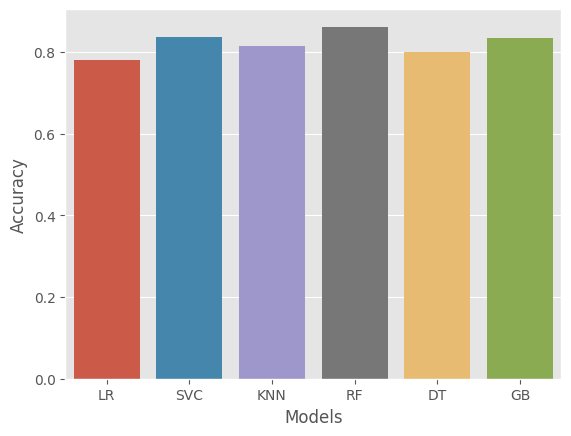

In [159]:
sns.barplot(DF['Models'],DF['Accuracy'])

In [160]:
DF2=pd.DataFrame({'Models':['LR','SVC','KNN','RF','DT','GB'],
                 'Accuracy':[precision_score(y_test,y_predL),
                            precision_score(y_test,y_predS),
                            precision_score(y_test,y_predK),
                            precision_score(y_test,y_predR),
                            precision_score(y_test,y_predD),
                            precision_score(y_test,y_predG)]})

C:\Users\Ravish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='Models', ylabel='Accuracy'>

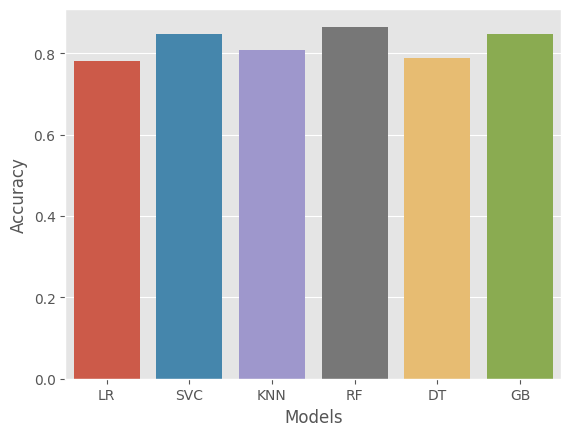

In [161]:
sns.barplot(DF2['Models'],DF2['Accuracy'])

#### Training  whole data 

In [162]:
X_sample=scaler.fit_transform(X_sample)

In [163]:
RF.fit(X_sample,y_sample)

RandomForestClassifier()

#### Saving model

In [171]:
joblib.dump(RF,'bank_churn_model_final')

['bank_churn_model_final']

In [165]:
Model=joblib.load('bank_churn_model')

In [166]:
X_sample

array([[-0.3222175 ,  0.11100571, -1.03058283, ..., -0.57208153,
        -0.45965953, -0.83918226],
       [-0.44201527,  0.01081433, -1.39835781, ..., -0.57208153,
         2.17552324, -0.83918226],
       [-1.59643023,  0.11100571,  1.17606709, ..., -0.57208153,
        -0.45965953, -0.83918226],
       ...,
       [ 0.41835059, -0.59033398, -1.7661328 , ..., -0.57208153,
        -0.45965953, -0.83918226],
       [-0.74695507,  1.21311095, -1.39835781, ...,  1.74800261,
        -0.45965953, -0.83918226],
       [ 0.1243015 ,  0.31138848,  0.80829211, ..., -0.57208153,
        -0.45965953, -0.83918226]])

In [199]:
sample_data = {
    'CreditScore': [619],
    'Age': [42],
    'Tenure': [2],
    'Balance': [200],
    'NumOfProducts': [1],
    'HasCrCard': [1],  
    'IsActiveMember': [1],  
    'EstimatedSalary': [101348],
    'Geography_Germany': [0],  
    'Geography_Spain': [0],  
    'Gender_Male': [0]  
}
new_data = pd.DataFrame(sample_data)

# new_data_transformed = scaler.transform(new_data)

In [200]:
Model.predict(new_data)

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



array([0], dtype=int64)

In [172]:
getInfoDescribe(data)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB
None

DESCRIBE
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.0

In [173]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
